### Solutions of PS2

This notebook is in html. To be able to run it, please click: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/gunerilhan/economicgrowth/blob/master/ps2/ps2.ipynb)

In [1]:
# First import the packages we'll need
# Numpy is for numerical analysis
import numpy as np
# Pandas is for data storage and manipulation
import pandas as pd
# Matplotlib and seaborn are for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import style
style.use('https://gunerilhan.github.io/img/fivethirtyeight-modified.mplstyle')

In [2]:
# Different color palettes that can be used in plots
colors = {0:['#264653','#219D8F','#E9C46A','#F4A261','#E76F51'],
  1:['#003049','#D62828','#F77F00','#FCBF49','#EAE2B7'],
  2:['#F72585','#7209B7','#3A0CA3','#4361EE','#4CC9F0'],
  3: ['#165aa7','#cb495c','#bb60d5','#f47915','#06ab54','#002070','#b27d12','#007030']}



In questions 0 and 1, using  Penn World Table, https://www.rug.nl/ggdc/productivity/pwt/, you will do development accounting and growth accounting. In these questions, use
- 'rgdpo' (Output-side real GDP at chained PPPs (in mil. 2017USD)) as a measure of real GDP, 
- 'cn' (Capital stock at current PPPs (in mil. 2017USD)) as a measure of real capital stock, 
- 'emp' (Number of persons engaged (in millions)) as a measure of employment, and 
- 'hc' (Human capital index, based on years of schooling and returns to education) as a measure of human capital. You don't need to divide 'hc' with employment numbers as 'hc' is already a measure of average human capital in a society. 

Assume $\alpha=1/3$ for questions 0 and 1.

In [3]:
# Here, I download the Penn World Tables legend
df_legend = pd.read_excel('https://www.rug.nl/ggdc/docs/pwt100.xlsx',sheet_name='Legend')
df_legend.dropna(subset=['Variable name','Variable definition'],inplace=True)
# I create a dictionary of variables names and definitions
df_legend = dict(zip(df_legend['Variable name'],df_legend['Variable definition']))

In [4]:
# Here are the variables, we will need in this analysis
print('rgdpo = ', df_legend['rgdpo'])
print('cn = ', df_legend['cn'])
print('emp = ', df_legend['emp'])
print('hc =', df_legend['hc'])

rgdpo =  Output-side real GDP at chained PPPs (in mil. 2017US$)
cn =  Capital stock at current PPPs (in mil. 2017US$)
emp =  Number of persons engaged (in millions)
hc = Human capital index, based on years of schooling and returns to education; see Human capital in PWT9.


In [5]:
# now download the data
df = pd.read_excel('https://www.rug.nl/ggdc/docs/pwt100.xlsx',sheet_name='Data')

In [6]:
# create GDP per worker 
df['gdpPerworker'] = df['rgdpo']/df.emp
df['capPerworker'] = df['cn']/df.emp

**0.** Using 2019 values in Penn World Table, conduct development accounting of Brazil, France, Ghana and Viet Nam relative to the United Kingdom. Create a table summarizing your results. Briefly comment on the table.

In [7]:
# These are the list of countries we will analyze
country_list_0  = ['BRA','FRA','GHA','VNM','GBR']

**Solution:** Divide GDP per worker, capital per worker, human capital per worker by the Great Britain values. 

Lastly, calculate productivity differences as follows:
$$\frac{A_i}{A_{GBR}}=\frac{\frac{y_i}{y_{GBR}}}{\frac{k_i^\alpha h_i^{1-\alpha}}{k_{GBR}^\alpha h_{GBR}^{1-\alpha}}}$$



In [8]:
# select 2019 values
df_2019 = df[df.year==2019].copy()
# I drop observations with missing values on 'gdpPerworker','capPerworker','hc' columns
df_2019 = df_2019.dropna(subset=('gdpPerworker','capPerworker','hc'))
# create new dataframe for UK values, as these will be used many times
GBR = df_2019[df_2019.countrycode=='GBR']

# I add extra columns to our df_2019 data
df_2019['gdpPerworker, GBR'] = GBR['gdpPerworker'].values[0] # gdp per worker of the UK
df_2019['capPerworker, GBR'] = GBR['capPerworker'].values[0] # capital per worker of the UK
df_2019['hc, GBR'] = GBR['hc'].values[0] # human capital per worker of the UK
# relative to the uk
df_2019['Rel. output per worker, y'] = df_2019['gdpPerworker']/df_2019['gdpPerworker, GBR']
df_2019['Rel. physical capital per worker, k'] = df_2019['capPerworker']/df_2019['capPerworker, GBR']
df_2019['Rel. human capital per worker, h'] = df_2019['hc']/df_2019['hc, GBR']

# factors of production relative to the UK
df_2019['Rel. factors of production'] = (df_2019['Rel. physical capital per worker, k']**(1/3)*
                                      df_2019['Rel. human capital per worker, h']**(2/3))

# productivity relative to the UK
df_2019['Rel. productivity, A'] = df_2019['Rel. output per worker, y']/df_2019['Rel. factors of production']


df_2019[df_2019.countrycode.isin(country_list_0)][['country','Rel. output per worker, y',
                                                   'Rel. physical capital per worker, k',
                                                   'Rel. human capital per worker, h',
                                                   'Rel. factors of production',
                                                   'Rel. productivity, A']].round(decimals=2).set_index('country')

,"Rel. output per worker, y","Rel. physical capital per worker, k","Rel. human capital per worker, h",Rel. factors of production,"Rel. productivity, A"
country,,,,,
Brazil,0.36,0.31,0.82,0.59,0.61
France,1.14,1.36,0.86,1.00,1.14
United Kingdom,1.00,1.00,1.00,1.00,1.00
Ghana,0.14,0.07,0.67,0.31,0.43
Viet Nam,0.16,0.09,0.76,0.37,0.43


In [9]:
df_2019

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,gdpPerworker,capPerworker,"gdpPerworker, GBR","capPerworker, GBR","hc, GBR","Rel. output per worker, y","Rel. physical capital per worker, k","Rel. human capital per worker, h",Rel. factors of production,"Rel. productivity, A"
139,AGO,Angola,Kwanza,2019,228151.015625,227855.718750,31.825295,16.644962,NaN,1.481984,...,13689.170002,82386.563838,90650.971454,463963.460912,3.773596,0.151010,0.177571,0.392725,0.301428,0.500981
279,ALB,Albania,Lek,2019,35890.019531,36103.042969,2.880917,1.075898,NaN,2.964992,...,33556.204444,213606.116534,90650.971454,463963.460912,3.773596,0.370169,0.460394,0.785721,0.657489,0.563004
349,ARE,United Arab Emirates,UAE Dirham,2019,681525.812500,645956.250000,9.770529,5.808834,NaN,2.746695,...,111202.393037,776465.542146,90650.971454,463963.460912,3.773596,1.226709,1.673549,0.727872,0.960689,1.276906
419,ARG,Argentina,Argentine Peso,2019,991646.312500,977420.562500,44.780677,20.643215,1609.068998,3.096804,...,47348.271769,163483.181794,90650.971454,463963.460912,3.773596,0.522314,0.352362,0.820651,0.619111,0.843651
489,ARM,Armenia,Armenian Dram,2019,41048.628906,43582.574219,2.957731,0.966091,NaN,3.135995,...,45112.287815,102418.788213,90650.971454,463963.460912,3.773596,0.497648,0.220748,0.831036,0.534210,0.931559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12529,VNM,Viet Nam,Dong,2019,750726.750000,724123.375000,96.462106,50.399563,2131.968232,2.869998,...,14367.651905,39866.682605,90650.971454,463963.460912,3.773596,0.158494,0.085926,0.760547,0.367671,0.431076
12599,YEM,Yemen,Yemeni Rial,2019,50052.933594,51828.058594,29.161922,5.531877,NaN,1.842989,...,9368.982393,99162.238865,90650.971454,463963.460912,3.773596,0.103352,0.213729,0.488391,0.370794,0.278732
12669,ZAF,South Africa,Rand,2019,748940.000000,734094.375000,58.558270,18.642710,2191.363362,2.908202,...,39377.021128,155433.734776,90650.971454,463963.460912,3.773596,0.434381,0.335013,0.770671,0.583803,0.744053
12739,ZMB,Zambia,Kwacha,2019,57956.183594,56783.714844,17.861030,5.225448,NaN,2.686845,...,10866.765605,58124.051291,90650.971454,463963.460912,3.773596,0.119875,0.125277,0.712012,0.398978,0.300455


In [10]:
# Same, but in percentages
(df_2019[df_2019.countrycode.isin(country_list_0)][['country','Rel. output per worker, y',
                                                   'Rel. physical capital per worker, k',
                                                   'Rel. human capital per worker, h',
                                                   'Rel. factors of production',
                                                   'Rel. productivity, A']].set_index('country')*100).round(decimals=2)

,"Rel. output per worker, y","Rel. physical capital per worker, k","Rel. human capital per worker, h",Rel. factors of production,"Rel. productivity, A"
country,,,,,
Brazil,36.16,31.38,81.92,59.49,60.79
France,113.94,135.88,85.60,99.85,114.10
United Kingdom,100.00,100.00,100.00,100.00,100.00
Ghana,13.61,6.87,66.96,31.34,43.43
Viet Nam,15.85,8.59,76.05,36.77,43.11


In [11]:
# Next, I'll plot bar graphs depicting the factors of production relative to the UK
# I'll rename columns

# These are the columns to be renamed
cols = ['Rel. output per worker, y',
       'Rel. physical capital per worker, k',
       'Rel. human capital per worker, h',
        'Rel. factors of production',
        'Rel. productivity, A']
# these are the new names of the columns
cols2 = ['Output per worker',
       'Physical capital per worker',
       'Human capital per worker',
        'Factors of production',
        'Productivity']
# I'll need this dictionary
cols_rename = dict(zip(cols,cols2))
# As all the data will be relative to the UK, I don't need to plot UK (all of them will be equal to 1)
country_list_0.remove('GBR')

# this procedure, does the following steps
# 1) selects only the countries that we are interested in
# 2) selects only the variables we are interested in
# 3) renames columns
# 4) converts columns into rows
# 5) sorts data by country
df_bar = df_2019[df_2019.countrycode.isin(country_list_0)][['country',*cols]].rename(columns=cols_rename).melt(
    id_vars='country',value_vars=cols2,var_name='Factor',value_name='Relative to UK').sort_values('country')

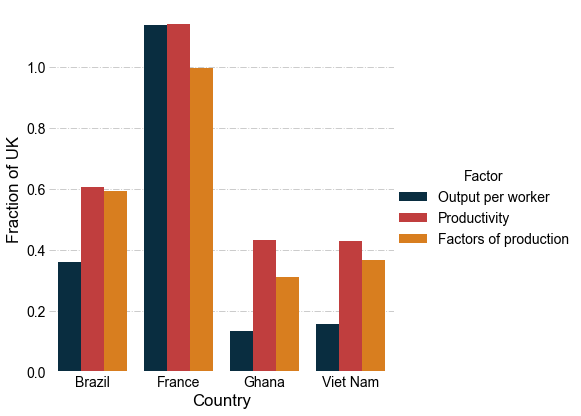

In [12]:
# let's plot our results
g = sns.catplot(x='country', y="Relative to UK", hue="Factor", 
                data=df_bar[df_bar.Factor.isin(['Output per worker',
                                            'Factors of production',
                                            'Productivity'])],
                                        height=6, kind="bar")
g.despine(left=True)
g.set_ylabels("Fraction of UK")
g.set_xlabels('Country')

In Brazil, factors of production and productivity are about 60 percent of UK levels, leading to its output per worker being less than 40 percent of UK output per worker. 

In France, capital per worker is approximately 40 percent higher than the UK, but human capital is 85 percent lower. Overall, the factors of production per worker is very similar to the factors of production per worker in the UK. The reason why France has larger output per worker is due to France being more productive. 

Ghana and Vietnam both have low levels of productivity (about 40 percent of the UK producitivity) and even lower levels of factors of production per worker, leading to their output per worker being approximately 15 percent of the UK output per worker.

**1.** Conduct growth accounting of Portugal, Kenya, Morocco, Thailand and the United Kingdom.
Examine data from 1970 to 2019. Create a table summarizing your results. Briefly comment
on the table.

In [13]:
# These are the list of countries we will analyze
country_list_1  = ['PRT','KEN','MAR','THA','GBR']

In [14]:
# here I select the countries we are interested in and also years we are interested in
df1 = df[(df.countrycode.isin(country_list_1))&(df.year.isin([1970,2019]))][
    ['country','year','gdpPerworker','capPerworker','hc']].copy()
# sort values
df1.sort_values(['country','year'],inplace=True)
df1.set_index(['country','year'],inplace=True)

In [15]:
# here is the data to work on
df1

gdpPerworker   capPerworker        hc
country        year                                       
Kenya          1970   4349.683981    9680.912794  1.286897
               2019   8883.236449   21549.980342  2.346707
Morocco        1970  10173.911995    9345.257302  1.078822
               2019  25081.780868  132930.331581  1.935794
Portugal       1970  23180.094353   64385.732348  1.396434
               2019  65535.458339  587308.834414  2.512751
Thailand       1970   6031.764434   12647.267416  1.433593
               2019  31744.870820  149971.957011  2.804449
United Kingdom 1970  37581.647528  141580.224908  2.741508
               2019  90650.971454  463963.460912  3.773596

In [16]:
# now calucalate the factor growth rates and productivity growth rates using formulas described in the question
# growth rate of x from t to t+n = (log(x_{t+n})-log(x_t))/n
def growth_rates(group):
    return (group.iloc[1].apply(np.log)-group.iloc[0].apply(np.log))/49

df1_growth=df1.groupby('country',axis=0).apply(growth_rates)

# productivity growth rate = growth rate of gdp per worker - alpha*growth rate of physical capital per worker 
#                                                        - (1-alpha)* growth rate og human capital per worker
alpha=1/3
df1_growth['productivity'] = (df1_growth['gdpPerworker'] - alpha*df1_growth['capPerworker']
                               - (1-alpha)*df1_growth['hc'])

In [17]:
# here is our results
df1_growth.round(decimals=3)

,gdpPerworker,capPerworker,hc,productivity
country,,,,
Kenya,0.015,0.016,0.012,0.001
Morocco,0.018,0.054,0.012,-0.008
Portugal,0.021,0.045,0.012,-0.002
Thailand,0.034,0.050,0.014,0.008
United Kingdom,0.018,0.024,0.007,0.006


In [18]:
# The results, now in percentages
(df1_growth*100).round(decimals=3)

,gdpPerworker,capPerworker,hc,productivity
country,,,,
Kenya,1.457,1.633,1.226,0.096
Morocco,1.841,5.418,1.193,-0.760
Portugal,2.121,4.512,1.199,-0.182
Thailand,3.389,5.047,1.369,0.794
United Kingdom,1.797,2.422,0.652,0.555


In [19]:
# now calculate the shares of contribution of economic growth
# contribution of hc = (1-alpha)*growth rate of human capital / (growth rate of gdp per worker)
# contribution of k = (alpha)*growth rate of physical capital / (growth rate of gdp per worker)
# contribution of A = growth rate of productivity / (growth rate of gdp per worker)

weight = np.array([((1-alpha),alpha,1)])
weight.shape = (1,3)
income = df1_growth['gdpPerworker'].values
income.shape = (5,1)
## I multiply growth rate of hc with (1-alpha),
#              growth rate of k with alpha
#             growth rate of A with 1
# I divide each of the above by growth rate of gdp per worker
df1_growth_cont = df1_growth[['hc','capPerworker','productivity']].multiply(weight)/income
# rename columns
df1_growth_cont.columns=['Human Capital','Physical Capital','Productivity']
# Here is our results, contributions to economic growth
(df1_growth_cont).round(2)

,Human Capital,Physical Capital,Productivity
country,,,
Kenya,0.56,0.37,0.07
Morocco,0.43,0.98,-0.41
Portugal,0.38,0.71,-0.09
Thailand,0.27,0.50,0.23
United Kingdom,0.24,0.45,0.31


In [20]:
# convert columns into rows
df1_growth_cont.reset_index().melt(id_vars='country',var_name='Factor')

,country,Factor,value
0,Kenya,Human Capital,0.560903
1,Morocco,Human Capital,0.431962
2,Portugal,Human Capital,0.376829
3,Thailand,Human Capital,0.269375
4,United Kingdom,Human Capital,0.241923
5,Kenya,Physical Capital,0.373552
6,Morocco,Physical Capital,0.980794
7,Portugal,Physical Capital,0.709023
8,Thailand,Physical Capital,0.496381
9,United Kingdom,Physical Capital,0.449342


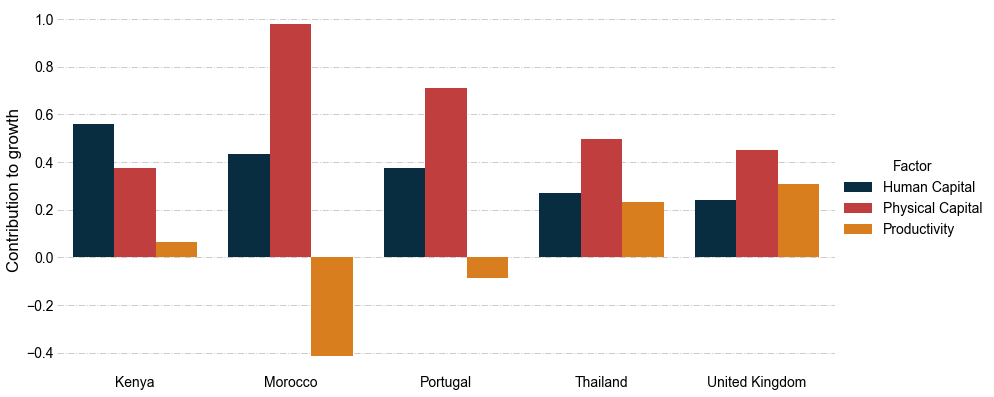

In [21]:
# plot the data
g = sns.catplot(x='country', y="value", hue="Factor", data=df1_growth_cont.reset_index()
                .melt(id_vars='country',var_name='Factor'),
                height=6, aspect=2,kind="bar")
g.despine(left=True,bottom=True)
g.set_ylabels("Contribution to growth")
g.set_xlabels("")

In Kenya, human capital growth is the main contributer to economic growth, then comes physical capital accumulation. Productivity growth had negligible effects on economic growth. 

In Morocco, the main contributer to economic growth is physical capital accumulation. Productivity regressed while human capital contributed to 40 percent of economic growht.

In Portugal, physical capital accumulation and then human capital accumulation are the main sources of economic growth. Productivity regressed a little bit. 

In Thailand, which is the fastest growing economy, physical capital accumulation is the main sources of economic growth, then comes the human capital accumulation and then the productivity growth.

In the UK, physical capital accumulation is the primary source of economic growth. Productivity growth is the next big source of economic growth.

**2.** Consider the extended Solow model. Suppose the production function is $Y =  K^\alpha (ehL)^{1-\alpha}.$

a. Write down the formula for change in capital per effective worker, $\dot{\tilde{k}}$, as a function of capital per effective worker, $\tilde{k}$, and other exogenous variables in the model.

b. Suppose that investment rate is 22%, $\gamma =.22$, depreciation rate is 5\%, $\delta=.05$, population growth rate is 1\%, $n=.01$, labor-augmenting technological progress rate is 1.2\%, $g = .012$, human capital is equal to 1, $h=1$,  and capital income share is .33, $\alpha=.33$. Find steady state capital per effective worker, income per effective worker, consumption per effective worker.

c. Suppose at time $t=0$, the economy is at the steady state, and level of labor-augmenting technology is equal to 1, $e(0)=1$. What's the income per worker level at time $t=20$? Remember that if a variable (say M) grows at a constant rate, say m, then the value of M at time $t$ is equal to $\exp(mt)$ times the value of M at time $0$, i.e. $M(t)=M(0)\exp(mt).$

d. Suppose again that at time $t=0$, the economy is at the steady state and level of labor-augmenting technology is equal to 1, $e(0)=1$. Now, suddenly (and unexpectedly) the human capital increases by 10\%, i.e. $h^{new} = 1.1$. Starting from the steady state you found in part b, simulate the model for 100 periods, and calculate capital per effective worker, capital per worker, income per effective worker, and income per worker at each time period.


In [22]:
# First, set our parameter values
alpha = .33
delta = .05
h = 1
n = 0.01
g = 0.012
gamma = .22
# this is one way of defining a function in python
# f is our production function, output per effective workers
f = lambda k,h: k**alpha*h**(1-alpha)
# this is our kdot function
kdot = lambda k,h: gamma*k**alpha*h**(1-alpha)-(delta+n+g)*k

At the steady state:
    $$\tilde{k}^\ast = \left(\frac{\gamma}{n+g+\delta}\right)^{1/(1-\alpha)}h $$

Everytime:
  $$ \tilde{y} = \tilde{k}^\alpha h^{1-\alpha} $$
  $$ \tilde{c} = (1-\gamma)\tilde{y}$$

In [23]:
# calculate the steady state variables
k_tilde_ss = (gamma/(n+delta+g))**(1/(1-alpha))*h
y_tilde_ss = k_tilde_ss**alpha*h**(1-alpha)
c_tilde_ss = y_tilde_ss*(1-gamma)

In [24]:
print('Steady state capital per effective worker = ', np.round(k_tilde_ss,decimals=2))
print('Steady state ouput per effective worker = ', np.round(y_tilde_ss,decimals=2))
print('Steady state consumption per effective worker = ', np.round(c_tilde_ss,decimals=2))

Steady state capital per effective worker =  5.3
Steady state ouput per effective worker =  1.73
Steady state consumption per effective worker =  1.35


Recall the definition of $\tilde{y} \equiv \frac{Y}{eL}$ and  $y\equiv \frac{Y}{L}$. Therefore, $y=e\tilde{y}$. In part c, the economy is at the steady state, $\tilde{y}\ast$, and $e$ is growing at a constant rate. But we know the initial value of $e(0)=1$, the growth rate of $e$, $g=0.02$. Therefore, $e(20)=e(0)\exp(g*20).$ Hence, $y(20)=e(20)*\tilde{y}^\ast$. 

In [25]:
print('Income per worker at t=20 is equal to', np.round(np.exp(g*20)*y_tilde_ss,decimals=2))

Income per worker at t=20 is equal to 2.2


To solve for part d, we first need to simulate $\tilde{k}$ and $\tilde{y}$ over time. We can quite easily calculate $e$ over time using the initial value of $e$, $e(0)$, and the growth rate of $e$, $g=0.02$. Then using $y(t)=\tilde{y(t)}e(t)$ equality, we can generete $y$ sequence over time.

In [26]:
# k_tilde_seq will be sequence of k tilde over time
# since the economy was at the steady state, I initiate k_tilde sequence with 10 values...
# all equal to the steady state value
# you assume this is the value of k_tilde before time t=0 and at time t=0,...
# as there is no change in k_tilde at time t=0. k_tilde will begin increasing at t=1
k_tilde_seq = [k_tilde_ss,]*10

In [27]:
# I also create a sequence of human capital
# h is equal to 1 initially, then it becomes 1.1
h_seq = np.ones(111)
# assume 9th element of the sequence corresponds to time t=0
h_seq[9:] = 1.1

In [28]:
# starting from the 9th element, or time t=0, simulate the model to get k_tilde over time
for t in range(9,110):
    # k_prime is the next periods capital
    # k_prime is equal to current capital plus the change in capital
    k_prime = k_tilde_seq[t]+kdot(k_tilde_seq[t],h_seq[t])
    k_tilde_seq.append(k_prime)

In [29]:
# generate e sequence as given in the formula: e(t) = e(0)*exp(g*t)
e_seq = [np.exp(t*g) for t in range(-9,102)]

In [30]:
# k = k_tilde*e
k_seq = np.array(k_tilde_seq)*np.array(e_seq)

In [31]:
# y_tilde = k_tilde^alpha*h^(1-alpha)
y_tilde_seq = [f(k_tilde_seq[t],h_seq[t]) for t in range(111)]

In [32]:
# y = y_tilde*e
y_seq = np.array(y_tilde_seq)*np.array(e_seq)

In [33]:
# now put all these variables into a table
df2 = pd.DataFrame({'Time':np.arange(-9,102),
                    'h':h_seq,
                    'k tilde':k_tilde_seq,
                   'y tilde':y_tilde_seq,
                   'e':e_seq,
                   'k':k_seq,
                   'y':y_seq})

In [34]:
# here is how our data looks like
df2.head(15)

,Time,h,k tilde,y tilde,e,k,y
0,-9,1.0,5.296820,1.733505,0.897628,4.754572,1.556042
1,-8,1.0,5.296820,1.733505,0.908464,4.811970,1.574827
2,-7,1.0,5.296820,1.733505,0.919431,4.870062,1.593838
3,-6,1.0,5.296820,1.733505,0.930531,4.928854,1.613080
4,-5,1.0,5.296820,1.733505,0.941765,4.988357,1.632553
5,-4,1.0,5.296820,1.733505,0.953134,5.048578,1.652262
6,-3,1.0,5.296820,1.733505,0.964640,5.109526,1.672208
7,-2,1.0,5.296820,1.733505,0.976286,5.171210,1.692396
8,-1,1.0,5.296820,1.733505,0.988072,5.233638,1.712827
9,0,1.1,5.296820,1.847813,1.000000,5.296820,1.847813


In [35]:
df2[df2.Time==30].round(decimals=2)

,Time,h,k tilde,y tilde,e,k,y
39,30,1.1,5.7,1.89,1.43,8.18,2.71


In [36]:
df2[df2.Time==60].round(decimals=2)

,Time,h,k tilde,y tilde,e,k,y
69,60,1.1,5.8,1.9,2.05,11.91,3.91


Text(0.5, 1.0, '$\\tilde{k}$')

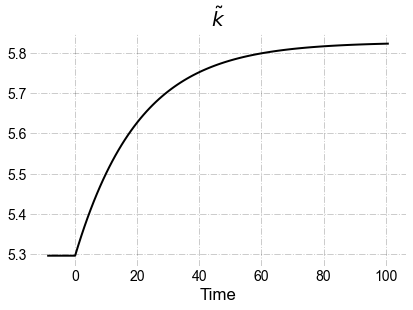

In [37]:
# plot k_tilde over time
fig,ax = plt.subplots()
plt.plot(df2.Time,df2['k tilde'],'k',linewidth=2)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel('Time')
ax.set_title(r'$\tilde{k}$')

Text(0.5, 1.0, '$\\tilde{y}$')

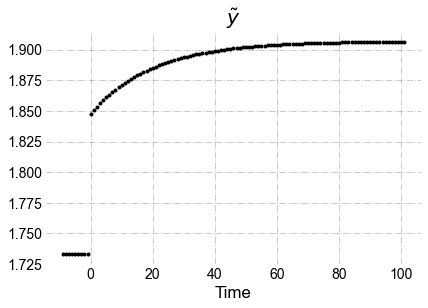

In [38]:
# plot y_tilde over time
fig,ax = plt.subplots()
plt.plot(df2.Time,df2['y tilde'],'k.',linewidth=2)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel('Time')
ax.set_title(r'$\tilde{y}$')

Text(0.5, 1.0, '$k$')

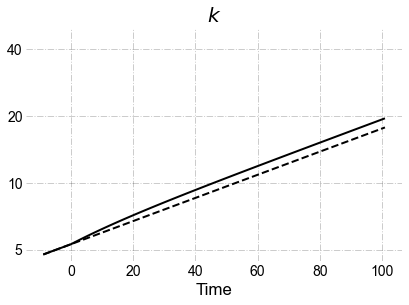

In [39]:
# plot k over time
yticks = [5,10,20,40]
fig,ax = plt.subplots()
plt.plot(df2.Time,df2['k'],'k',linewidth=2)
plt.plot(df2.Time,k_tilde_ss*np.array(e_seq),'k--',linewidth=2)
ax.set_yscale('log')
ax.set_ylim(ymax=50)
ax.set_yticks(yticks)
ax.set_yticklabels(yticks)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel('Time')
ax.set_title(r'$k$')

Text(0.5, 1.0, '$y$')

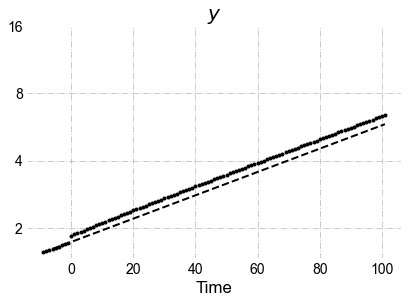

In [40]:
# plot y over time
yticks = [2,4,8,16]
fig,ax = plt.subplots()
plt.plot(df2.Time,df2['y'],'k.',linewidth=2)
plt.plot(df2.Time,y_tilde_ss*np.array(e_seq),'k--',linewidth=2)
ax.set_yscale('log')
ax.set_ylim(ymax=9)
ax.set_yticks(yticks)
ax.set_yticklabels(yticks)
ax.set_xlabel('Time')
ax.set_title(r'$y$')

Text(0.5, 1.0, '$\\dot{y}/y$')

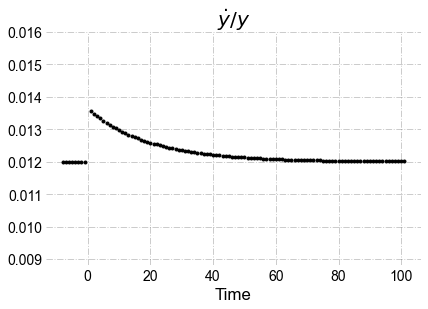

In [41]:
# plot growth rate of y over time
fig,ax = plt.subplots()
plt.plot(df2.Time,np.log(df2['y']).diff(),'k.',linewidth=2)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_ylim(ymax= .016)
ax.set_xlabel('Time')
ax.set_title(r'$\dot{y}/y$')

Notice that how a human capital increase leads to accumulation of capital per worker. Such capital accumulation increases rate of economic growth. As the the effect of capital accumulation subsumes, economic growth rate goes down to the rate of technological progress, which is the only source of economic growth in the long run.